In [5]:
import gdown

file_id = "1joSkS2xx1wSLgYQpFL_T_rPZdwmPuDBn"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, "bank_churn.csv", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1joSkS2xx1wSLgYQpFL_T_rPZdwmPuDBn
To: /content/bank_churn.csv
100%|██████████| 562k/562k [00:00<00:00, 103MB/s]


'bank_churn.csv'

## **🏦 Bank Customer Churn Prediction – Exploratory Data Analysis**

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("viridis")

import warnings
warnings.filterwarnings("ignore")

## **Load Dataset**

In [6]:
df = pd.read_csv("bank_churn.csv")
df.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Dataset Overview**

In [8]:
df.shape

(10000, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


## **Missing Values & Duplicates**

In [12]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [14]:
df.duplicated().sum()

np.int64(0)

## **Target Variable Analysis (Churn)**

In [15]:
churn_dist = df['churn'].value_counts()
churn_pct = df['churn'].value_counts(normalize=True) * 100

churn_dist, churn_pct


(churn
 0    7963
 1    2037
 Name: count, dtype: int64,
 churn
 0    79.63
 1    20.37
 Name: proportion, dtype: float64)

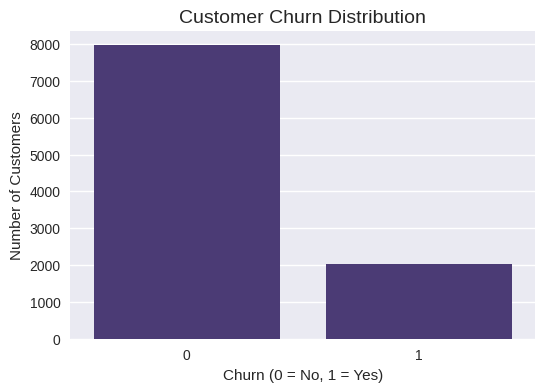

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df)
plt.title("Customer Churn Distribution", fontsize=14)
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()


## **Gender vs Churn**


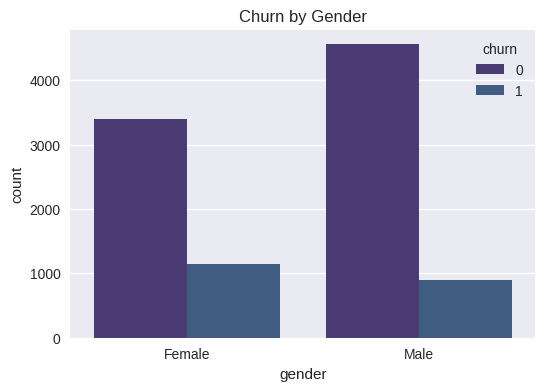

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='churn', data=df)
plt.title("Churn by Gender")
plt.show()


## **Country vs Churn**

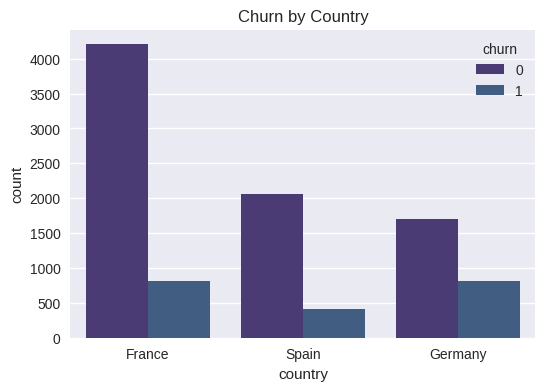

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='country', hue='churn', data=df)
plt.title("Churn by Country")
plt.show()


## **Activity Status vs Churn**

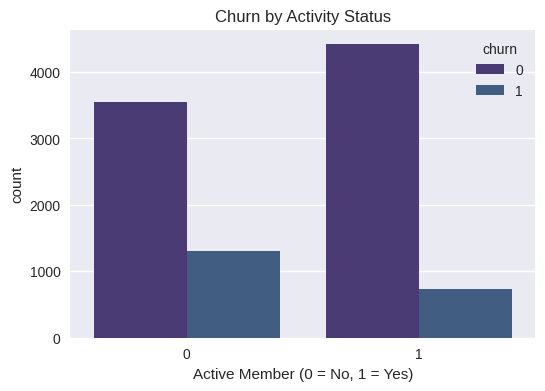

In [22]:

plt.figure(figsize=(6,4))
sns.countplot(x='active_member', hue='churn', data=df)
plt.title("Churn by Activity Status")
plt.xlabel("Active Member (0 = No, 1 = Yes)")
plt.show()


## **Products vs Churn**

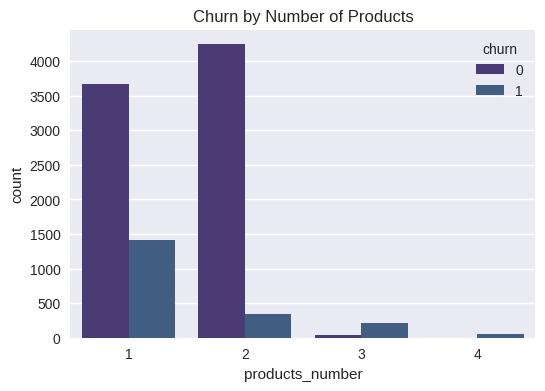

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='products_number', hue='churn', data=df)
plt.title("Churn by Number of Products")
plt.show()


## **Numerical Feature Distributions**

## Age

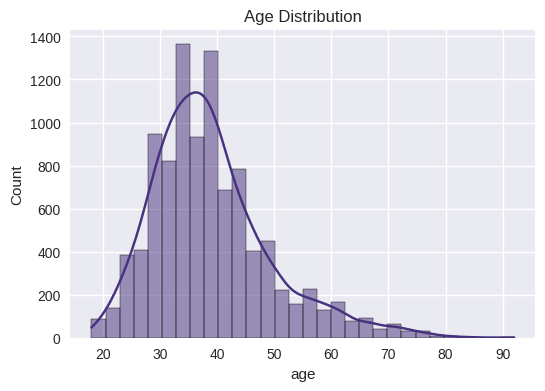

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


## Credit Score

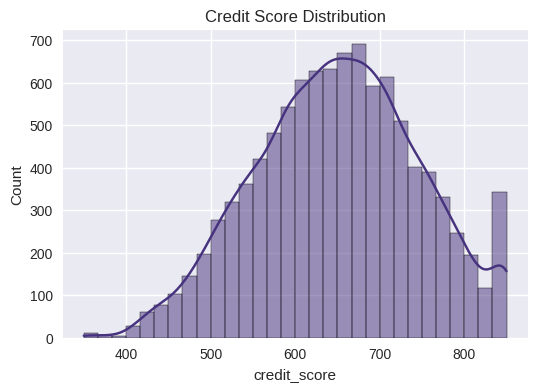

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(df['credit_score'], bins=30, kde=True)
plt.title("Credit Score Distribution")
plt.show()


## **Age vs Churn**

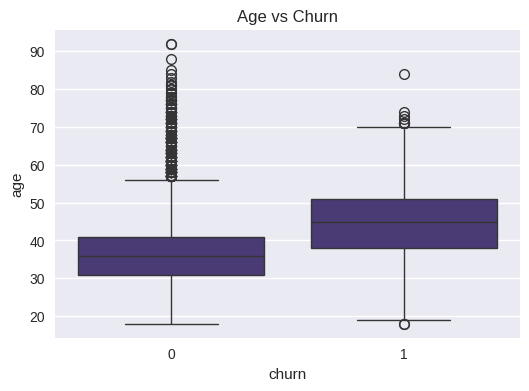

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='age', data=df)
plt.title("Age vs Churn")
plt.show()


## **Balance vs Churn**

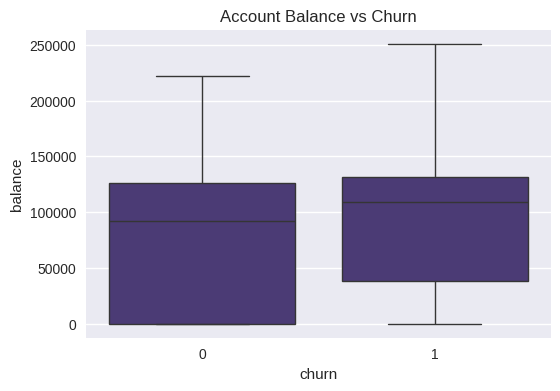

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='balance', data=df)
plt.title("Account Balance vs Churn")
plt.show()


## **Correlation Heatmap**

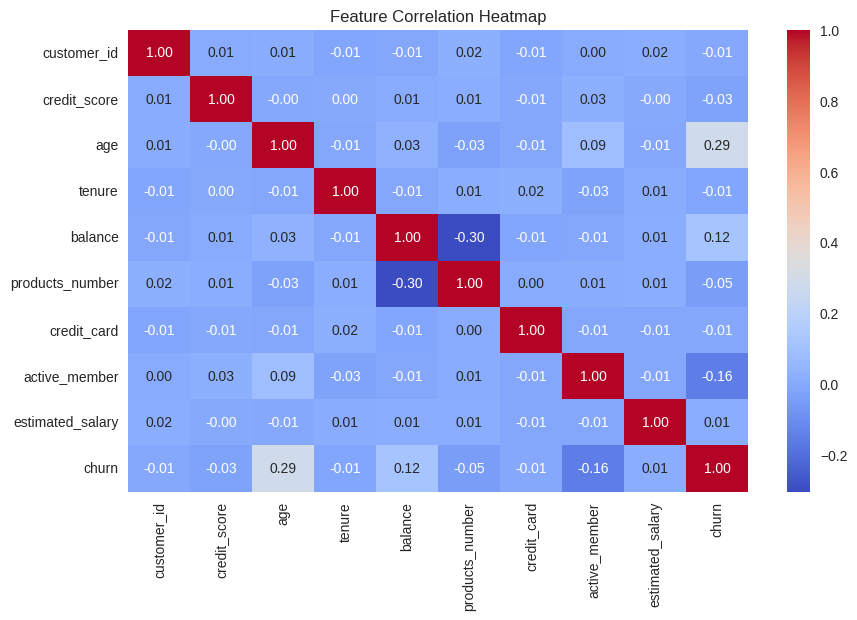

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Feature Correlation Heatmap")
plt.show()
